<a href="https://colab.research.google.com/github/wissal488/ENSIAS/blob/main/Classification_binaire_avec_un_perceptron_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span align="right">**Réalisé par : Ajbabdi Wissal**</span>

#**TP Perceptron Simple**

##**1.Créer une base de données**



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
x,y=make_blobs(n_samples=150, n_features=2, centers=2)
print(np.shape(x),np.shape(y))

(150, 2) (150,)


In [37]:
y=y.reshape(len(y),1)
print(np.shape(y))

(150, 1)


In [ ]:
y 

In [38]:
print(x[1],y[1])

[-8.78493153 -0.24594144] [1]


##**2.Visualisation de la BD**

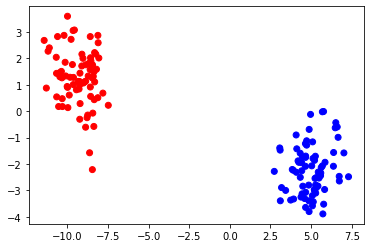

In [39]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="bwr")

##**3.Modèle : perceptron simple**

In [40]:
def agregation(x,W,w0):
  return w0+x.dot(W)

def activation(z):
  return 1/(1+np.exp(-z))

def perceptron_simple(x,W,b):
  z=agregation(x,W,b)
  a=activation(z)
  return a    

In [41]:
def initialisation():
  W=np.random.rand(np.shape(x)[1],1)
  w0=np.random.rand(1)
  return W,w0

In [44]:

W,w0 = initialisation()
print(W,w0)

[[0.1416121 ]
 [0.95999778]] [0.06859604]


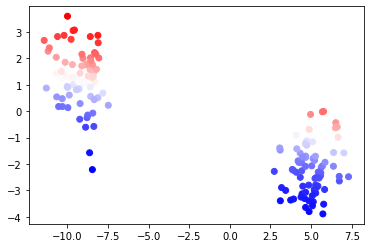

In [45]:
y_pred =perceptron_simple(x,W,w0)
plt.scatter(x[:,0],x[:,1],c=y_pred,cmap="bwr")

##<font color='blue'>**Après la prediction**</font>

In [46]:
def initialisation():
  W=np.random.rand(np.shape(x)[1],1)
  w0=np.random.rand(1)
  return W,w0
  
def predict(x,W,w0):
  a=perceptron_simple(x,W,w0)
  return a>=0.5
  
W,w0 = initialisation()
print(W,w0)

[[0.61836913]
 [0.24559414]] [0.52335245]


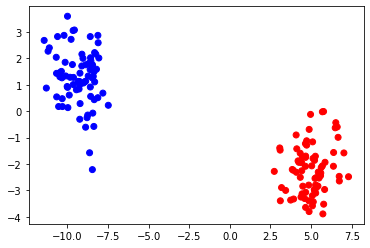

In [47]:
y_pred =predict(x,W,w0)
plt.scatter(x[:,0],x[:,1],c=y_pred,cmap="bwr")

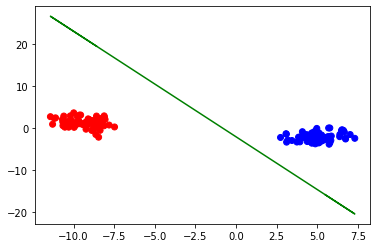

In [48]:

x2=(-x[:,0]*W[0]-w0)/W[1]
plt.scatter(x[:,0],x[:,1],c=y,cmap="bwr")

plt.plot(x[:,0],x2,c="green")
#plt.xlim(x[:,0].min(),x[:,0].max())
#plt.ylim(x[:,1].min(),x[:,1].max())

(-5.890127015913681, 5.595390128833871)

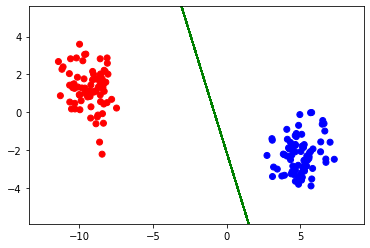

In [69]:

x2=(-x[:,0]*W[0]-w0)/W[1]
plt.scatter(x[:,0],x[:,1],c=y,cmap="bwr")

plt.plot(x[:,0],x2,c="green")
plt.xlim(x[:,0].min()-2,x[:,0].max()+2)
plt.ylim(x[:,1].min()-2,x[:,1].max()+2)

##**4.Fonction LogLoss**

C'est une fonction qui permet de quantifier les erreurs effectuées par un modèle.

In [52]:
def fonction_LogLoss(y,x,W,w0):
  y_pred=perceptron_simple(x,W,w0)
  n=len(y)
  return -(1/n)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

print("l'erreur est:",fonction_LogLoss(y,x,W,w0))

l'erreur est: 4.023343681871467


##**5.Apprentissage: Descente de gradient**

L'algorithme descente de graduit est une algorithme itérative qui permet à chaque fois d'ajuster le vecteur W et le biais.

In [65]:
 def gradient(x,y,y_p):
   dw0=(-1/len(y))*np.sum(y-y_p)
   dW=(-1/len(y))*x.T.dot(y-y_p)
   return dW,dw0

def apprentissage(y,x,W,w0,learning_rate=0.001,nb_it=1000 ):
  for i in range(nb_it):
    dW,dw0=gradient(x,y,perceptron_simple(x,W,w0))
    W=W-learning_rate*dW
    w0=w0-learning_rate*dw0
  return W,w0

In [66]:
W_estim,w0_estim=apprentissage(y,x,W,w0,learning_rate=0.1,nb_it=1000)
print(W_estim)

[[-1.26344797]
 [ 0.83984904]]


In [67]:
print(w0_estim)

[0.31815064]


(-5.890127015913681, 5.595390128833871)

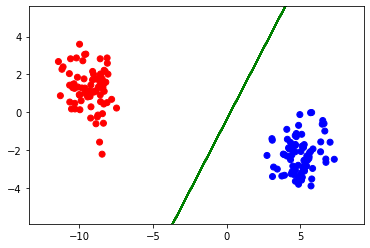

In [70]:
x2=(-x[:,0]*W_estim[0]-w0_estim)/W_estim[1]
plt.scatter(x[:,0],x[:,1],c=y,cmap="bwr")

plt.plot(x[:,0],x2,c="green")
plt.xlim(x[:,0].min()-2,x[:,0].max()+2)
plt.ylim(x[:,1].min()-2,x[:,1].max()+2)